# Proyecto final: Análisis al top 100 más escuchado de Spotify
## ¿Qué tienen de especial estas canciones?

-----------------------------------------------
#### *Por: Julio César Avila Torreblanca*

#### Resumen:
En este trabajo se reaiza una conexión a la API de Spotify para obtener información sobre las canciones contenidas en una playlist (top 100 más escuchadas). Depués de ello se analiza la información extraida para realizar un estudio estadístico y obtener insights.

## Parte 1: Conexión a la API de Spotify y extracción de los datos.

La librería que usaremos para conectarnos a la API es *spotipy*.

In [1]:

!pip install spotipy

You should consider upgrading via the 'c:\users\cesar.avila\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Importamos las librerías que necesitaremos a lo largo del proyecto.

In [180]:
# Conextion to the Spotify's API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Data transformation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

pd.options.mode.chained_assignment = None

import datetime

pd.set_option('display.max_columns', None)

Lo primero a realizar es obtener la informaición de la API de Spotify, para ello creamos la siguiente función la cual se conecta a la API y extrae la información solicitada. Los únicos parámetros a ser ingresados son las llaves para realizar la conexión y el link de la playlist que se quiera analizar.

In [51]:
def extractDataTracks(playlist_link, clientID, clientSecretID):
    """"This function connects to the Spotify API and extracts data
    about songs in a playlist. 

    Args:
        playlist_link (string): it's the link of the playlist. The playlist
            must contains all the songs that will be analysed.
        clientID (string): credendial requiared to connecto to the API.
        clienSecretID (string): secret credendial requiared to connecto to the 
        API.
    
    Returns: list of dictionaries. Each dictionary is a register.
    """
    #Authentication - without user
    client_credentials_manager = SpotifyClientCredentials(
        client_id=clientID, client_secret=clientSecretID)

    sp = spotipy.Spotify(
        client_credentials_manager = client_credentials_manager)

    #Extrackting URI's Tracks From a Playlist. 
    playlist_URI = playlist_link.split("/")[-1].split("?")[0]
    
    track_uris = [ x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"] ]
    l=[]
    
    for track in sp.playlist_tracks(playlist_URI)["items"]:
        track_uri = track["track"]["uri"]
        dic1 = {
            'id_track': track['track']['id'],
            'popularity_track':  track["track"]["popularity"],
            'name_track': track["track"]["name"],
            'release_date': track['track']['album']['release_date'],
            'album': track["track"]["album"]["name"],
            'id_artist': track['track']['artists'][0]['id'],
            'name_artist': track["track"]["artists"][0]["name"]   
            #'genre': sp.artist(track["artists"][0]["external_urls"]["spotify"]['genres'])
        }
        dic2 = sp.audio_features(track_uri)[0]
        dic3 = sp.artist(track['track']['artists'][0]['id'])
        dic1 = {**dic1, **dic2, **dic3}
        l.append(dic1)

    return l

Ya que se tiene una función que permite conectarse a la API y extraer la información, la probamos con la playlist que queremos analizar: *Top 50 Glogabl*. Esta información la transformamos en un dataframe para reaizar el análisis.

In [275]:
# Secrets
clientID = 'f14262d671a34fe284e39287566169dc'
clientSecretID = '4fa209b07f8d43169735dbe7df6602ed'

# Data extracion
playlist_link_BillieEilish = 'https://open.spotify.com/playlist/37i9dQZF1DZ06evO4hswvr?si=3dead096f1734786'
playlist_link_Top50Mx = 'https://open.spotify.com/playlist/37i9dQZEVXbO3qyFxbkOE1?si=15e9481b4741495e'
playlist_link_Top50Global = 'https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF?si=1367122882d04888'
playlist_link_TopHits2022 = 'https://open.spotify.com/playlist/4e36iSHdNaSDaIfOKmCvXd?si=4b8f396642324d03'
playlist_link_MiTop2021 = 'https://open.spotify.com/playlist/37i9dQZF1EUMDoJuT8yJsl?si=e1f4a8cc4b434e10'
data = extractDataTracks(playlist_link_TopHits2022, clientID, clientSecretID)

# Dataframe creation
df = pd.DataFrame(data)
df1 = pd.DataFrame(data)
df.head()

,id_track,popularity_track,name_track,release_date,album,id_artist,name_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,external_urls,followers,genres,href,images,name,popularity
0,4LRPiXqCikLlN15c3yImP7,96,As It Was,2022-03-31,As It Was,6KImCVD70vtIoJWnq6nGn3,Harry Styles,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,artist,6KImCVD70vtIoJWnq6nGn3,spotify:artist:6KImCVD70vtIoJWnq6nGn3,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 22936235}",[pop],https://api.spotify.com/v1/artists/6KImCVD70vt...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Harry Styles,91
1,1PckUlxKqWQs3RlWXVBLw3,91,About Damn Time,2022-04-14,About Damn Time,56oDRnqbIiwx4mymNEv7dS,Lizzo,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,artist,56oDRnqbIiwx4mymNEv7dS,spotify:artist:56oDRnqbIiwx4mymNEv7dS,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,{'spotify': 'https://open.spotify.com/artist/5...,"{'href': None, 'total': 4939879}","[dance pop, escape room, minnesota hip hop, po...",https://api.spotify.com/v1/artists/56oDRnqbIiw...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Lizzo,80
2,4k6Uh1HXdhtusDW5y8Gbvy,86,Bad Habit,2022-07-15,Gemini Rights,57vWImR43h4CaDao012Ofp,Steve Lacy,0.686,0.494,1,-7.093,1,0.0355,0.6130,0.000058,0.4020,0.700,168.946,artist,57vWImR43h4CaDao012Ofp,spotify:artist:57vWImR43h4CaDao012Ofp,https://api.spotify.com/v1/tracks/4k6Uh1HXdhtu...,https://api.spotify.com/v1/audio-analysis/4k6U...,232067,4,{'spotify': 'https://open.spotify.com/artist/5...,"{'href': None, 'total': 1895481}",[afrofuturism],https://api.spotify.com/v1/artists/57vWImR43h4...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Steve Lacy,83
3,0QBzMgT7NIeoCYy3sJCof1,88,Bam Bam (feat. Ed Sheeran),2022-03-04,Bam Bam (feat. Ed Sheeran),4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,0.756,0.697,8,-6.377,1,0.0401,0.1820,0.000000,0.3330,0.956,94.996,artist,4nDoRrQiYLoBzwC5BhVJzF,spotify:artist:4nDoRrQiYLoBzwC5BhVJzF,https://api.spotify.com/v1/tracks/0QBzMgT7NIeo...,https://api.spotify.com/v1/audio-analysis/0QBz...,206071,4,{'spotify': 'https://open.spotify.com/artist/4...,"{'href': None, 'total': 27853235}","[dance pop, pop, post-teen pop, uk pop]",https://api.spotify.com/v1/artists/4nDoRrQiYLo...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Camila Cabello,82
4,4h9wh7iOZ0GGn8QVp4RAOB,94,I Ain't Worried,2022-05-13,I Ain’t Worried (Music From The Motion Picture...,5Pwc4xIPtQLFEnJriah9YJ,OneRepublic,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,artist,5Pwc4xIPtQLFEnJriah9YJ,spotify:artist:5Pwc4xIPtQLFEnJriah9YJ,https://api.spotify.com/v1/tracks/4h9wh7iOZ0GG...,https://api.spotify.com/v1/audio-analysis/4h9w...,148486,4,{'spotify': 'https://open.spotify.com/artist/5...,"{'href': None, 'total': 14220303}","[dance pop, piano rock, pop, pop rock]",https://api.spotify.com/v1/artists/5Pwc4xIPtQL...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",OneRepublic,84


Veamos qué tipo de variables tenemos y más información sobre el dataframe.

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_track          100 non-null    object 
 1   popularity_track  100 non-null    int64  
 2   name_track        100 non-null    object 
 3   release_date      100 non-null    object 
 4   album             100 non-null    object 
 5   id_artist         100 non-null    object 
 6   name_artist       100 non-null    object 
 7   danceability      100 non-null    float64
 8   energy            100 non-null    float64
 9   key               100 non-null    int64  
 10  loudness          100 non-null    float64
 11  mode              100 non-null    int64  
 12  speechiness       100 non-null    float64
 13  acousticness      100 non-null    float64
 14  instrumentalness  100 non-null    float64
 15  liveness          100 non-null    float64
 16  valence           100 non-null    float64
 17

In [277]:
df.shape

(100, 32)

In [278]:
df.isnull().any()

id_track            False
popularity_track    False
name_track          False
release_date        False
album               False
id_artist           False
name_artist         False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
external_urls       False
followers           False
genres              False
href                False
images              False
name                False
popularity          False
dtype: bool

Vemos que tenemos en total 32 variables, algunas son cuantitativas y otras cualitativas. Además, el dataframe contiene 50 registros (50 canciones) y no se tienen datos vacios.

## Parte 2: Liempieza y ordenamiento de los datos

Las tareas que realizaremos en esta parte son:

- Renombrar las variables para un mejor manejo y entendimiento.
- Cambiar la variable que contiene fecha a tipo *DateTime*.
- Limpiar los valores de las variables: *followers* and *Popularity* (artist_popularity).
- Hacer una copia del dataframe tomando solo las columnas que nos serán útiles.

In [279]:
# Capitalize column's names
df.columns = df.columns.str.capitalize()
df.columns

Index(['Id_track', 'Popularity_track', 'Name_track', 'Release_date', 'Album',
       'Id_artist', 'Name_artist', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Type', 'Id', 'Uri', 'Track_href', 'Analysis_url',
       'Duration_ms', 'Time_signature', 'External_urls', 'Followers', 'Genres',
       'Href', 'Images', 'Name', 'Popularity'],
      dtype='object')

In [280]:
# Rename some variables
df.rename(columns = {'Popularity': 'Popularity_artist', 
                     'Followers': 'Followers_artist', 
                     'Genres': 'Genres_artist'}, inplace = True)
df.columns

Index(['Id_track', 'Popularity_track', 'Name_track', 'Release_date', 'Album',
       'Id_artist', 'Name_artist', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Type', 'Id', 'Uri', 'Track_href', 'Analysis_url',
       'Duration_ms', 'Time_signature', 'External_urls', 'Followers_artist',
       'Genres_artist', 'Href', 'Images', 'Name', 'Popularity_artist'],
      dtype='object')

In [281]:
# Tansform Release_date into datetime
df['Release_date'] = pd.to_datetime(df['Release_date']).dt.date
df['Release_date'].head()

0    2022-03-31
1    2022-04-14
2    2022-07-15
3    2022-03-04
4    2022-05-13
Name: Release_date, dtype: object

In [282]:
# Clean Followers_artist
###########################################Preguntar
for x in range(df.shape[0]):
    df['Followers_artist'][x] = df['Followers_artist'][x]['total']
df['Followers_artist'].head()

0    22936235
1     4939879
2     1895481
3    27853235
4    14220303
Name: Followers_artist, dtype: object

In [283]:
# Copy impoortant columns
important_columns = ['Name_track',
                    'Name_artist',
                    'Album',
                    'Release_date',
                    'Popularity_track',
                    'Genres_artist',
                    'Popularity_artist',
                     'Followers_artist',
                    'Danceability',
                    'Energy',
                    'Key',
                    'Loudness',
                    'Mode',
                    'Speechiness',
                    'Instrumentalness',
                    'Liveness',
                    'Valence',
                    'Tempo',
                    'Type',
                    'Duration_ms',
                    'Time_signature']
                    
    
df_imp = df[important_columns].copy()
df_imp.head()

,Name_track,Name_artist,Album,Release_date,Popularity_track,Genres_artist,Popularity_artist,Followers_artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Type,Duration_ms,Time_signature
0,As It Was,Harry Styles,As It Was,2022-03-31,96,[pop],91,22936235,0.520,0.731,6,-5.338,0,0.0557,0.001010,0.3110,0.662,173.930,artist,167303,4
1,About Damn Time,Lizzo,About Damn Time,2022-04-14,91,"[dance pop, escape room, minnesota hip hop, po...",80,4939879,0.836,0.743,10,-6.305,0,0.0656,0.000000,0.3350,0.722,108.966,artist,191822,4
2,Bad Habit,Steve Lacy,Gemini Rights,2022-07-15,86,[afrofuturism],83,1895481,0.686,0.494,1,-7.093,1,0.0355,0.000058,0.4020,0.700,168.946,artist,232067,4
3,Bam Bam (feat. Ed Sheeran),Camila Cabello,Bam Bam (feat. Ed Sheeran),2022-03-04,88,"[dance pop, pop, post-teen pop, uk pop]",82,27853235,0.756,0.697,8,-6.377,1,0.0401,0.000000,0.3330,0.956,94.996,artist,206071,4
4,I Ain't Worried,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,2022-05-13,94,"[dance pop, piano rock, pop, pop rock]",84,14220303,0.704,0.797,0,-5.927,1,0.0475,0.000745,0.0546,0.825,139.994,artist,148486,4


## Parte 3: Exploración de los datos

Veamos que artista contiene más canciones en el top 100.

In [294]:
#top_artists = df_imp.groupby('Name_artist')['Name_artist'].count('N_appearence')
#top_artists = df_imp['Name_artist'].value_counts().reset_index(name='N_appearences')
top_artists = df_imp.groupby(['Name_artist'])['Name_artist'].count().reset_index(name='N_appearences')
top_artists = top_artists[top_artists['N_appearences'] > 1]
top_artists

,Name_artist,N_appearences
4,Bad Bunny,2
7,Besomorph,6
8,Beyoncé,2
12,Calvin Harris,2
15,Charlie Puth,2
17,DJ Khaled,2
19,Doja Cat,3
23,Ed Sheeran,2
25,Elton John,2
31,Harry Styles,3


In [319]:
sorted_top_artists = top_artists.sort_values(by='N_appearences', ascending=True)
sorted_top_artists

,Name_artist,N_appearences
4,Bad Bunny,2
8,Beyoncé,2
12,Calvin Harris,2
15,Charlie Puth,2
17,DJ Khaled,2
23,Ed Sheeran,2
25,Elton John,2
45,Lil Nas X,2
19,Doja Cat,3
31,Harry Styles,3


Text(0.5, 0, 'Number of appearences')

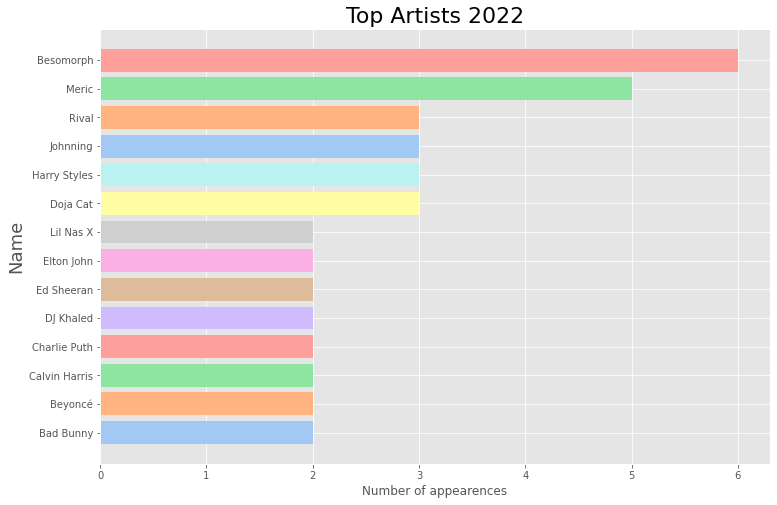

In [326]:
plt.barh('Name_artist', 
         'N_appearences',
         data=sorted_top_artists,
         color=sns.color_palette('pastel'))
plt.title('Top Artists 2022', size=22)
plt.ylabel('Name', size=18)
plt.xlabel('Number of appearences')